# Logistic Regression


We will implement the logistic regression algorithm with the following parameters.  

Let $\Pr(C_1|x) = \sigma({\bf{w}}^T{\bf{x}}+w_0)$ and $\Pr(C_2|{\bf{x}}) = 1 - \sigma({\bf{w}}^T{\bf{x}}+w_0)$.  Learn the parameters ${\bf{w}}$ and $w_0$ by conditional likelihood maximization. More specifically we will use Newton's algorithm to optimize the parameters and add a penalty of $0.5\lambda ||\bf{w}||_2^2$ to regularize the weights. Then we will find the optimal hyperparameter $\lambda$ by 10-fold cross-validation.



We know $\sigma(\mathbf w^T\mathbf x+w_0)=\frac{1}{1+\exp\{\mathbf w^T\mathbf x+w_0\}}$, and the conditional likelihood maximization with the penalty is $\min_w \sum_{i=1}^n\mathrm{lgt}(y_i\vec{w}^T\vec{x}_i)+0.5\lambda\Vert \mathbf w\Vert^2$, and using the Newton's algorithm, we first compute the gradient and get
$$
\nabla_w \left(\mathrm{lgt}(y_i\vec{w}^T\vec{x}_i)+0.5\lambda \Vert\mathbf w\Vert^2\right)=\left(p(\mathbf x_i;\vec{w})-\frac{y_i+1}{2}\right)\vec{x}_i+\lambda\mathbf w
$$
where $\vec{w}=[\mathbf w,w_0]^T$, and $\vec{x}_i=[\mathbf x_1,1]^T$. Then, the hessian is
$$
H_i=\vec{x}_i[\nabla_w p(\mathbf x_i;\vec{w})]^T+\lambda I= \sigma(\mathbf w^T\mathbf x+w_0)[1-\sigma(\mathbf w^T\mathbf x+w_0)]\vec{x}_i{\vec{x}_i}^T+\lambda I
$$

In [59]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler
import math

In [60]:
X_1 = pd.read_csv("datasets/logistic_regression-dataset/trainData1.csv", header=None).to_numpy()
X_2 = pd.read_csv("datasets/logistic_regression-dataset/trainData2.csv", header=None).to_numpy()
X_3 = pd.read_csv("datasets/logistic_regression-dataset/trainData3.csv", header=None).to_numpy()
X_4 = pd.read_csv("datasets/logistic_regression-dataset/trainData4.csv", header=None).to_numpy()
X_5 = pd.read_csv("datasets/logistic_regression-dataset/trainData5.csv", header=None).to_numpy()
X_6 = pd.read_csv("datasets/logistic_regression-dataset/trainData6.csv", header=None).to_numpy()
X_7 = pd.read_csv("datasets/logistic_regression-dataset/trainData7.csv", header=None).to_numpy()
X_8 = pd.read_csv("datasets/logistic_regression-dataset/trainData8.csv", header=None).to_numpy()
X_9 = pd.read_csv("datasets/logistic_regression-dataset/trainData9.csv", header=None).to_numpy()
X_10 = pd.read_csv("datasets/logistic_regression-dataset/trainData10.csv", header=None).to_numpy()
Y_1 = pd.read_csv("datasets/logistic_regression-dataset/trainLabels1.csv", header=None).to_numpy()
Y_2 = pd.read_csv("datasets/logistic_regression-dataset/trainLabels2.csv", header=None).to_numpy()
Y_3 = pd.read_csv("datasets/logistic_regression-dataset/trainLabels3.csv", header=None).to_numpy()
Y_4 = pd.read_csv("datasets/logistic_regression-dataset/trainLabels4.csv", header=None).to_numpy()
Y_5 = pd.read_csv("datasets/logistic_regression-dataset/trainLabels5.csv", header=None).to_numpy()
Y_6 = pd.read_csv("datasets/logistic_regression-dataset/trainLabels6.csv", header=None).to_numpy()
Y_7 = pd.read_csv("datasets/logistic_regression-dataset/trainLabels7.csv", header=None).to_numpy()
Y_8 = pd.read_csv("datasets/logistic_regression-dataset/trainLabels8.csv", header=None).to_numpy()
Y_9 = pd.read_csv("datasets/logistic_regression-dataset/trainLabels9.csv", header=None).to_numpy()
Y_10 = pd.read_csv("datasets/logistic_regression-dataset/trainLabels10.csv", header=None).to_numpy()
test_X = pd.read_csv("datasets/logistic_regression-dataset/testData.csv", header=None).to_numpy()
test_Y = pd.read_csv("datasets/logistic_regression-dataset/testLabels.csv", header=None).to_numpy()

X = [X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10]
Y = [Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9,Y_10]
# scaler = StandardScaler()
# for i in range(10):
#     X[i] = scaler.fit_transform(X[i])
# test_x = scaler.fit_transform(test_X)
for i in range(10):
    for j in range(len(Y[i])):
        Y[i][j] = -1 if Y[i][j] == 5 else 1
for i in range(len(test_Y)):
    test_Y[i] = -1 if test_Y[i] == 5 else 1


In [61]:
def lgt(t):
    return math.log(1 + math.exp(-1 * t))
def sgm(t):
    return 1 / (1 + math.exp(-1 * t))

def newton_logistic(X, Y, maxIter, stepSize, lam):
    n, d = len(Y), len(X[0])
    w = np.matrix(np.zeros(d+1))
    for _ in range(maxIter):
        g, H = np.matrix(np.zeros(d+1)), np.empty([d+1,d+1])
        H.fill(0)
        # print(H.shape)
        for i in range(n):
            x = np.matrix(np.append(X[i], [1]))
            # print(x)
            p = sgm(np.matmul(w, x.T))
            g += (p - (1 + Y[i]) / 2) * x + lam * w
            H += p * (1 - p) * np.matmul(x.transpose(), x) + lam * np.identity(d+1)
        # print(H.shape, g.shape)
        inv = LA.solve(H, g.T)
        # print(inv.T)
        w -= stepSize * inv.T
        # print(w)
        # print(k)
    return w

In [62]:
# Cross-validation
lambda_lst = range(50)
p_lst = np.zeros(50)
for k, lam in enumerate(lambda_lst):
    for l in range(10):
        train_x, train_y, test_x, test_y = np.array([]), np.array([]), np.array([]), np.array([])
        for i in range(10):
            if i != l:
                train_x = np.append(train_x, X[i], axis = 0) if len(train_x != 0) else X[i]
                train_y = np.append(train_y, Y[i], axis = 0) if len(train_y != 0) else Y[i]
            else:
                test_x, test_y = X[i], Y[i]
        w = np.asarray(newton_logistic(train_x, train_y, 10, 0.1, lam)).flatten()
        w, w_0 = w[:-1], w[-1]
        correct, incorrect = 0, 0
        for i in range(len(test_y)):
            y = np.dot(w, test_x[i]) + w_0 
            y = 1 if y >= 0 else -1
            if y == test_y[i]:
                correct += 1
            else:
                incorrect += 1
        p_lst[k] += correct / (correct + incorrect)
        # print(k, l)
    p_lst[k] /= 10

 lambda  Accuracy
      0     0.859
      1     0.880
      2     0.883
      3     0.884
      4     0.881
      5     0.884
      6     0.886
      7     0.885
      8     0.884
      9     0.883
     10     0.884
     11     0.886
     12     0.886
     13     0.885
     14     0.884
     15     0.883
     16     0.883
     17     0.883
     18     0.884
     19     0.886
     20     0.884
     21     0.884
     22     0.884
     23     0.884
     24     0.884
     25     0.884
     26     0.884
     27     0.884
     28     0.884
     29     0.884
     30     0.883
     31     0.882
     32     0.883
     33     0.883
     34     0.883
     35     0.883
     36     0.883
     37     0.883
     38     0.882
     39     0.882
     40     0.882
     41     0.882
     42     0.882
     43     0.882
     44     0.882
     45     0.882
     46     0.882
     47     0.881
     48     0.881
     49     0.881
The best lambda value is [ 6 11 12 19]


Text(0, 0.5, 'Cross-validation accuracy')

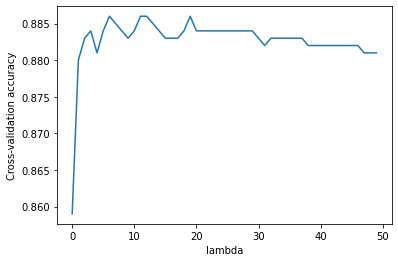

In [63]:
report = pd.DataFrame(data={'lambda': lambda_lst, 'Accuracy': p_lst})
lam = np.take(lambda_lst, np.where(p_lst == max(p_lst)), axis=0)
print(report.to_string(index=False))
print(f"The best lambda value is {lam[0]}")

# draw a graph that shows the cross-validation accuracy of logistic regression as lambda varies
plt.figure(1)
plt.plot(lambda_lst, p_lst)
plt.xlabel("lambda")
plt.ylabel("Cross-validation accuracy")

In [64]:
all_X = np.concatenate(X, axis = 0)
all_Y = np.concatenate(Y, axis = 0)
feature_w = np.zeros([len(lam[0]), len(X_1[0])+1])
for i, l in enumerate(lam[0]):
    # print(feature_w[i].shape)
    feature_w[i] = np.asarray(newton_logistic(all_X, all_Y, 10, 0.1, l)).flatten()
accuracy = np.zeros(len(feature_w))
for k, l in enumerate(feature_w):
    r, w = 0, 0
    for i in range(len(test_Y)):
        x = np.append(test_X[i], [1])
        y = np.dot(l, x)
        prob = sgm(y)
        if prob >= 0.5:
            if test_Y[i] == 1: r += 1
            else: w += 1
        else:
            if test_Y[i] == -1: r += 1
            else: w += 1
    accuracy[k] = r / (r + w)
report = pd.DataFrame(data={'lambda':lam[0], 'Accuracy': accuracy})
print(report.to_string(index=False))

 lambda  Accuracy
      6  0.900000
     11  0.890909
     12  0.890909
     19  0.900000


In [65]:
print("We find four lambdas that has the maximum accuracy.")

for i, l in enumerate(lam[0]):
    print(f"Lambda value: {l}")
    print(f"w = {feature_w[i][:-1]}")
    print(f"w0 = {feature_w[i][-1]}")
    if i < len(lam[0])-1:
        print("---------------------------------")

We find four lambdas that has the maximum accuracy.
Lambda value: 6
w = [ 0.00179785 -0.00181426 -0.01589582 -0.0039954  -0.0143161  -0.02973412
 -0.00574083 -0.00083558 -0.00828271 -0.0058612  -0.0201823   0.00083841
 -0.01062595 -0.02285495 -0.00243332  0.00418115 -0.0008408  -0.01030262
 -0.00498467  0.0074636  -0.00464429  0.00285369  0.00384346  0.0033522
 -0.00482153 -0.00624247  0.00064874 -0.01087162 -0.01345363 -0.00232591
  0.00522761 -0.00055225 -0.0033689   0.00540315  0.01629094  0.00979014
  0.00201263  0.00864601  0.0024932   0.00438504  0.00247113  0.00315333
  0.0394552   0.02051067 -0.00040089 -0.00219243  0.00897477  0.00115822
 -0.00184894  0.007873    0.01151867  0.01126569 -0.01292794  0.00797858
  0.01816413  0.0005114   0.00433908  0.00566246 -0.02198182 -0.01015395
  0.00975681  0.01863661  0.00512818  0.00236447]
w0 = -0.0006115021552480576
---------------------------------
Lambda value: 11
w = [ 0.00120843 -0.00120696 -0.01371048 -0.00363028 -0.01196962 -0.02

Comparing to the KNN technique, which predicts the y-value by finding the k-nearest neighbour of $x$ in the training set, the logistic regression has less expressivity once the testing sets are more complicated than training set. Since it has the boundry of being a logistic function, its result will be limited. However, with KNN, we can have less boundaries, since we predict $y$ directly based on the closest neighbours of $x$ in the training set, which could give us a better result.

On the other hand, since we can use a regularization term with the logistic regression while KNN doesn't, KNN could have a higer possibility of overfitting than logistic regression, which makes it less expressive in this context.

